In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
name = 'fil8_cluster_mergeRPKM'
df = pd.read_csv(name)
df

,Unnamed: 0,id,k_means_8,te_T0,te_T1,te_T2,RNA_0,RNA_1,RNA_2,totalRPF_0,totalRPF_1,totalRPF_2
0,6,NM_000027,1,0.63,0.73,0.48,15.779673,9.853032,11.982563,46.979570,33.656786,29.065811
1,17,NM_000097,1,0.21,1.00,0.16,28.458655,90.727115,379.128313,62.544405,363.153345,742.768500
2,22,NM_000108,1,1.23,1.60,0.93,31.595398,45.824872,24.910036,140.722476,279.857036,82.512417
3,23,NM_000110,1,-0.12,0.14,-0.40,12.743533,3.634789,2.724057,22.396782,8.076889,3.573496
4,25,NM_000113,1,0.43,0.67,0.39,26.830445,13.692785,13.217789,68.783423,43.303580,30.326759
...,...,...,...,...,...,...,...,...,...,...,...,...
8259,8238,NM_206963,8,-0.23,0.12,0.54,1.780463,3.792918,1.205574,2.933575,8.549584,3.031066
8260,8256,NM_212552,8,0.29,0.56,0.54,4.861972,20.045530,17.459072,11.290285,58.896941,44.525048
8261,8257,NM_213566,8,0.05,0.55,0.75,18.715295,20.843995,4.895318,36.801535,59.769398,14.421961
8262,8261,NM_213599,8,-0.47,0.00,-0.06,5.700539,3.408545,0.907917,7.739263,6.814963,1.525471


In [123]:
dat = df.drop(['Unnamed: 0','id','k_means_8'],axis=1)
up = max(dat['te_T0'])
down = min(dat['te_T0'])
dat[['RNA_0','RNA_1','RNA_2','totalRPF_0','totalRPF_1','totalRPF_2']] = np.log(dat[['RNA_0','RNA_1','RNA_2','totalRPF_0','totalRPF_1','totalRPF_2']])
#dat[['RNA_0','RNA_1','RNA_2','totalRPF_0','totalRPF_1','totalRPF_2']] = np.log(np.log(dat[['RNA_0','RNA_1','RNA_2','totalRPF_0','totalRPF_1','totalRPF_2']]))
#dat['RNA_0'] = (dat['RNA_0'] - (dat['RNA_0']).mean()) / (dat['RNA_0'].std())# * (up-down) +down
dat['RNA_0'] = (dat['RNA_0'] - min(dat['RNA_0'])) / (max(dat['RNA_0']) - min(dat['RNA_0'])) * (up-down) +down
dat['RNA_1'] = (dat['RNA_1'] - min(dat['RNA_1'])) / (max(dat['RNA_1']) - min(dat['RNA_1'])) * (up-down) +down
dat['RNA_2'] = (dat['RNA_2'] - min(dat['RNA_2'])) / (max(dat['RNA_2']) - min(dat['RNA_2'])) * (up-down) +down
dat['totalRPF_0'] = (dat['totalRPF_0'] - min(dat['totalRPF_0'])) / (max(dat['totalRPF_0']) - min(dat['totalRPF_0'])) * (up-down) +down
dat['totalRPF_1'] = (dat['totalRPF_1'] - min(dat['totalRPF_1'])) / (max(dat['totalRPF_1']) - min(dat['totalRPF_1'])) * (up-down) +down
dat['totalRPF_2'] = (dat['totalRPF_2'] - min(dat['totalRPF_2'])) / (max(dat['totalRPF_2']) - min(dat['totalRPF_2'])) * (up-down) +down

In [124]:
dat

,te_T0,te_T1,te_T2,RNA_0,RNA_1,RNA_2,totalRPF_0,totalRPF_1,totalRPF_2
0,0.63,0.73,0.48,0.041909,-0.904400,-1.189850,-0.099980,-0.548863,-1.065072
1,0.21,1.00,0.16,0.471188,0.715283,0.764064,0.113402,1.103516,0.786019
2,1.23,1.60,0.93,0.547299,0.216971,-0.775914,0.718069,0.922519,-0.469112
3,-0.12,0.14,-0.40,-0.113648,-1.631940,-2.027730,-0.652364,-1.540319,-2.262275
4,0.43,0.67,0.39,0.428302,-0.664309,-1.134356,0.184304,-0.373789,-1.040816
...,...,...,...,...,...,...,...,...,...
8259,-0.23,0.12,0.54,-1.546313,-1.600872,-2.488810,-2.168070,-1.500808,-2.356308
8260,0.29,0.56,0.54,-0.815061,-0.386246,-0.976944,-1.163125,-0.160136,-0.821471
8261,0.05,0.55,0.75,0.166106,-0.357749,-1.696184,-0.282051,-0.149921,-1.465361
8262,-0.47,0.00,-0.06,-0.699236,-1.678826,-2.649198,-1.444714,-1.658336,-2.748487


In [125]:
min(dat['RNA_2'])

-3.73

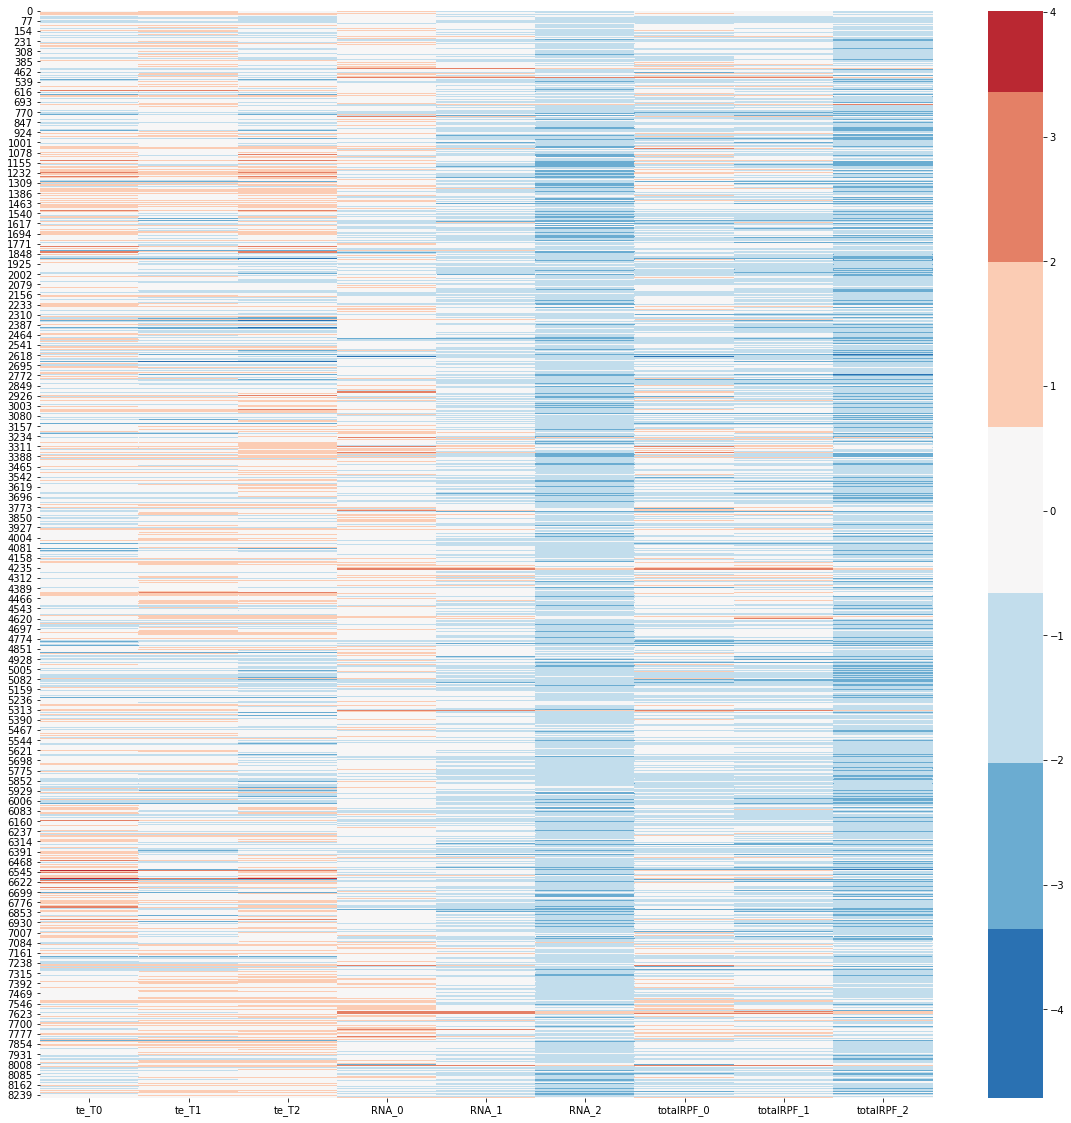

In [126]:
#sns.palplot(sns.color_palette("coolwarm", 7))
plt.figure(figsize=(20,20))
sns.heatmap(dat,cmap=sns.color_palette("RdBu_r", 7),center=0)
plt.savefig(name+'_logonce.png')

In [78]:
min(df['te_T0'])

-5.05

In [25]:
dat['RNA_0'] = (dat['RNA_0'] - min(dat['RNA_0'])) / (max(dat['RNA_0']) - min(dat['RNA_0'])) * (up-down) +down

4.1499999999999995